# TimML Notebook
## Cross-sectional model

In [4]:
from timml import *
import numpy as np
from matplotlib import pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (12, 8)

### Two-layer model with head-specified line-sink
Two-layer aquifer bounded on top by a semi-confined layer. Head above the semi-confining layer is 5. Head line-sink located at $x=0$ with head equal to 2, cutting through layer 0 only.

In [7]:
ml = ModelMaq(kaq=[1, 2], z=[4, 3, 2, 1, 0], c=[1000, 1000], topboundary='semi', hstar=5)
ls = HeadLineSink1D(ml, xls=0, hls=2, layers=0)
ml.solve()

x = np.linspace(-200, 200, 101)
h = ml.headalongline(x, np.zeros_like(x))
ml.plot(x, h[0], label='layer 0')
ml.plot(x, h[1], label='layer 1')
ml.legend(loc='best')

Number of elements, Number of equations: 2 , 1
..
solution complete


TypeError: plot() got an unexpected keyword argument 'label'

### 1D inhomogeneity

Three strips with semi-confined conditions on top of all three

Number of elements, Number of equations: 8 , 8
........
solution complete


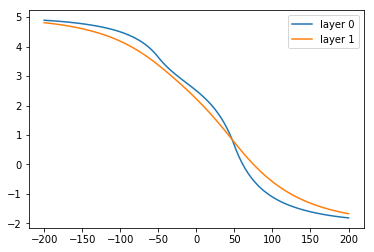

In [23]:
ml = ModelMaq(kaq=[1, 2], z=[4, 3, 2, 1, 0], c=[1000, 1000], topboundary='semi', hstar=5)
StripInhomMaq(ml, x1=-inf, x2=-50, kaq=[1, 2], z=[4, 3, 2, 1, 0], c=[1000, 1000], npor=0.3, 
                 topboundary='semi', hstar=5)
StripInhomMaq(ml, x1=-50, x2=50, kaq=[1, 2], z=[4, 3, 2, 1, 0], c=[1000, 1000], npor=0.3, 
                 topboundary='semi', hstar=3)
StripInhomMaq(ml, x1=50, x2=inf, kaq=[1, 2], z=[4, 3, 2, 1, 0], c=[1000, 1000], npor=0.3, 
                 topboundary='semi', hstar=-2)
ml.solve()

x = linspace(-200, 200, 101)
h = ml.headalongline(x, zeros(101))
plot(x, h[0], label='layer 0')
plot(x, h[1], label='layer 1')
legend(loc='best');

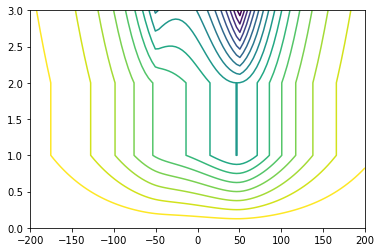

In [24]:
ml.vcontoursf1D(x1=-200, x2=200, nx=100, levels=20)

Three strips with semi-confined conditions at the top of the strip in the middle only. The head is specified in the strip on the left and in the strip on the right.

Number of elements, Number of equations: 8 , 10
........
solution complete


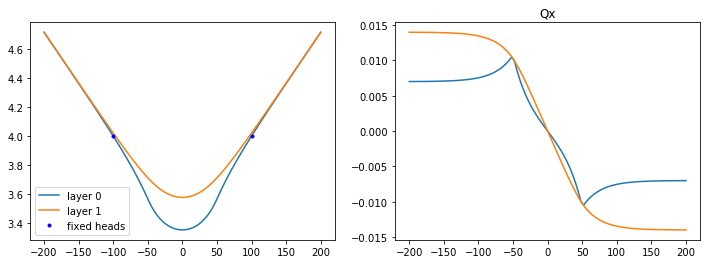

In [25]:
ml = ModelMaq(kaq=[1, 2], z=[4, 3, 2, 1, 0], c=[1000, 1000], topboundary='semi', hstar=5)
StripInhomMaq(ml, x1=-inf, x2=-50, kaq=[1, 2], z=[3, 2, 1, 0], c=[1000], npor=0.3, 
                 topboundary='conf')
StripInhomMaq(ml, x1=-50, x2=50, kaq=[1, 2], z=[4, 3, 2, 1, 0], c=[1000, 1000], npor=0.3, 
                 topboundary='semi', hstar=3)
StripInhomMaq(ml, x1=50, x2=inf, kaq=[1, 2], z=[3, 2, 1, 0], c=[1000], npor=0.3, 
                 topboundary='conf')
rf1 = Constant(ml, -100, 0, 4)
rf2 = Constant(ml, 100, 0, 4)

ml.solve()

x = linspace(-200, 200, 101)
h = ml.headalongline(x, zeros_like(x))
Qx, _ = ml.disvecalongline(x, zeros_like(x))

figure(figsize=(12, 4))
subplot(121)
plot(x, h[0], label='layer 0')
plot(x, h[1], label='layer 1')
plot([-100, 100], [4, 4], 'b.', label='fixed heads')
legend(loc='best')
subplot(122)
title('Qx')
plot(x, Qx[0], label='layer 0')
plot(x, Qx[1], label='layer 1')

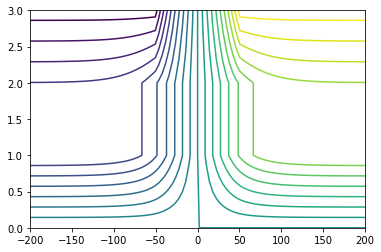

In [26]:
ml.vcontoursf1D(x1=-200, x2=200, nx=100, levels=20)

### Impermeable wall
Flow from left to right in three-layer aquifer with impermeable wall in bottom 2 layers

Number of elements, Number of equations: 3 , 3
...
solution complete


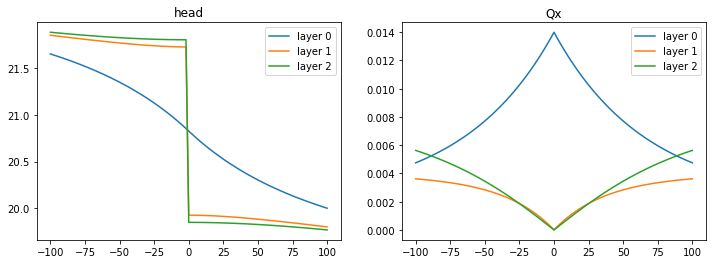

In [33]:
from timml import *
from pylab import *

ml = ModelMaq(kaq=[1, 2, 4], z=[5, 4, 3, 2, 1, 0], c=[5000, 1000])
uf = Uflow(ml, 0.002, 0)
rf = Constant(ml, 100, 0, 20)
ld1 = ImpLineDoublet1D(ml, xld=0, layers=[1, 2])
    
ml.solve()

x = linspace(-100, 100, 101)
h = ml.headalongline(x, zeros_like(x))
Qx, _ = ml.disvecalongline(x, zeros_like(x))

figure(figsize=(12, 4))
subplot(121)
title('head')
plot(x, h[0], label='layer 0')
plot(x, h[1], label='layer 1')
plot(x, h[2], label='layer 2')
legend(loc='best')
subplot(122)
title('Qx')
plot(x, Qx[0], label='layer 0')
plot(x, Qx[1], label='layer 1')
plot(x, Qx[2], label='layer 2')
legend(loc='best')

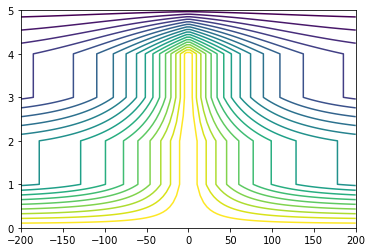

In [29]:
ml.vcontoursf1D(x1=-200, x2=200, nx=100, levels=20)